# Thermodynamic Calculation of Cementite ($Fe_3C$)

#### Bengt Hallstedt, Dejan Djurovic, Jörg von Appen, Richard Dronskowski, Alexey Dick, Fritz Körmann, Tilmann Hickel, Jörg Neugebauer, Thermodynamic properties of cementite, Calphad, Volume 34, Issue 1, March 2010, Pages 129-133, ISSN 0364-5916, http://dx.doi.org/10.1016/j.calphad.2010.01.004. (http://www.sciencedirect.com/science/article/pii/S0364591610000052)

The TDB file used here differs slightly from the published TDB to ensure compatibility with pycalphad's TDB parser. All phases except cementite are omitted, and the commands are expanded from their abbreviated form. The numerical results should be the same.

In [1]:
TDB = """
 ELEMENT C    GRAPHITE                   12.011     1054.0      5.7423 ! 
 ELEMENT FE   BCC_A2                     55.847     4489.0     27.2797 ! 
 TYPE_DEFINITION % SEQ * !
 TYPE_DEFINITION A GES AMEND_PHASE_DESCRIPTION @ MAGNETIC -3 0.28 !
 PHASE CEMENTITE_D011 %A 2 3 1 !
 CONSTITUENT CEMENTITE_D011 : FE : C : !
 PARAMETER  G(CEMENTITE_D011,FE:C;0) 0.01 +GFECEM; 6000 N !
 PARAMETER  TC(CEMENTITE_D011,FE:C;0) 0.01 485.00; 6000 N !
 PARAMETER  BMAGN(CEMENTITE_D011,FE:C;0) 0.01 1.008; 6000 N !
 FUNCTION GFECEM      0.01  +11369.937746-5.641259263*T-8.333E-6*T**4;
        43.00  Y  +11622.647246-59.537709263*T+15.74232*T*LN(T)
       -0.27565*T**2;
       163.00  Y  -10195.860754+690.949887637*T-118.47637*T*LN(T)
                  -0.0007*T**2+590527*T**(-1);
      6000.00  N !
"""

Do some initial setup, read the database and construct the abstract form of the Gibbs energy.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 9, 6
import numpy as np
from pycalphad import Database, Model
from pycalphad.eq.utils import make_callable
import pycalphad.variables as v

db = Database(TDB)
mod = Model(db, ['FE', 'C'], 'CEMENTITE_D011')

Now that we have our energy model, substitute in values for the composition of the phase. In this case, cementite has a fixed stoichiometry, so we set all the sublattice site occupancies to 1.

In [3]:
# Note: 4 moles of atoms per formula unit (Fe3C1). That's why we multiply times 4
gibbs_energy = 4.0 * mod.ast.subs({v.Y('CEMENTITE_D011', 0, 'FE'): 1.0, v.Y('CEMENTITE_D011', 1, 'C'): 1.0})
entropy = -gibbs_energy.diff(v.T)
isobaric_heat_capacity = -v.T * gibbs_energy.diff(v.T, v.T)

In [4]:
# Not sure why sympy can't automatically convert these; probably a bug somewhere
g_func = make_callable(gibbs_energy, [v.T])
s_func = make_callable(entropy, [v.T])
cp_func = make_callable(isobaric_heat_capacity, [v.T])

Use the functions to plot the thermodynamic properties.

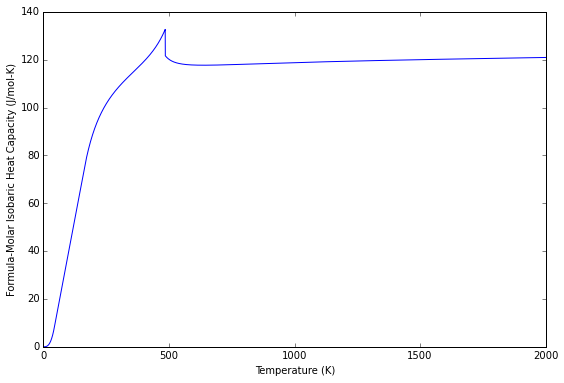

In [5]:
temperatures = np.linspace(1, 2000, 4000)
heat_capacities = cp_func(temperatures)
entropies = s_func(temperatures)
gibbs_energies = g_func(temperatures)

plt.xlabel('Temperature (K)')
plt.ylabel('Formula-Molar Isobaric Heat Capacity (J/mol-K)')
plt.plot(temperatures, heat_capacities)

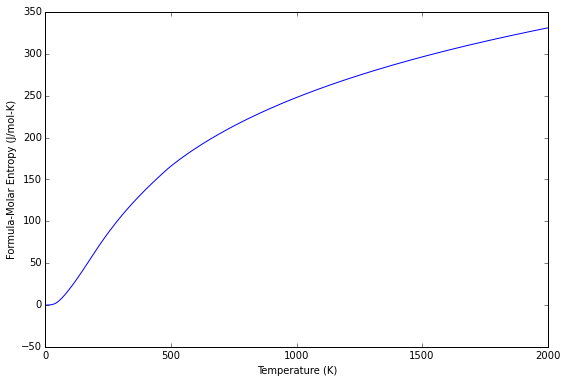

In [6]:
plt.xlabel('Temperature (K)')
plt.ylabel('Formula-Molar Entropy (J/mol-K)')
plt.plot(temperatures, entropies)

Note third law violation in the temperature limit. The amount of 0 K residual entropy is considered by the assessment authors to be small.

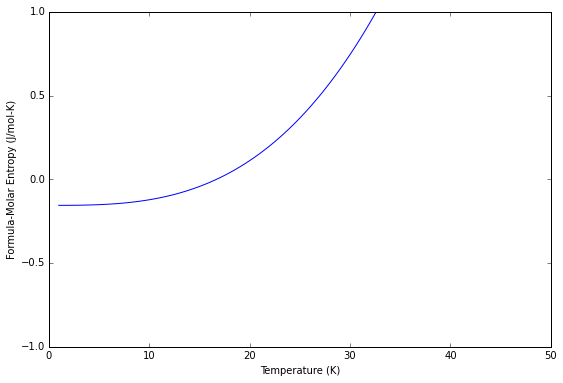

In [7]:
plt.xlabel('Temperature (K)')
plt.ylabel('Formula-Molar Entropy (J/mol-K)')
plt.xlim(0, 50)
plt.ylim(-1, 1)
plt.plot(temperatures, entropies)

## Calculated entropies for reference

In [8]:
print('Temperature(K)\tEntropy(J/mol-K)')
for temp, cp in zip(temperatures, entropies):
    print(str(temp)+'\t'+str(cp))

Temperature(K)	Entropy(J/mol-K)
1.0	-0.155071263149
1.49987496874	-0.154992043585
1.99974993748	-0.15483779103
2.49962490623	-0.154583498655
2.99949987497	-0.154204159634
3.49937484371	-0.153674767139
3.99924981245	-0.152970314343
4.4991247812	-0.152065794418
4.99899974994	-0.150936200538
5.49887471868	-0.149556525874
5.99874968742	-0.1479017636
6.49862465616	-0.145946906888
6.99849962491	-0.14366694891
7.49837459365	-0.14103688284
7.99824956239	-0.13803170185
8.49812453113	-0.134626399113
8.99799949987	-0.130795967801
9.49787446862	-0.126515401087
9.99774943736	-0.121759692143
10.4976244061	-0.116503834143
10.9974993748	-0.110722820259
11.4973743436	-0.104391643663
11.9972493123	-0.0974852975286
12.4971242811	-0.089978775028
12.9969992498	-0.0818470693337
13.4968742186	-0.0730651736186
13.9967491873	-0.0636080810554
14.496624156	-0.0534507848165
14.9964991248	-0.0425682780747
15.4963740935	-0.0309355540027
15.9962490623	-0.0185276057729
16.496124031	-0.00531942655826
16.9959989997	0.0